In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [2]:
using JLD2, CairoMakie, GLMakie

[ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
Precompiling GLMakie
  ✓ CodecBzip2
  ✓ libsixel_jll
  ✓ Sixel
  ✓ PNGFiles
  ✓ ForwardDiff
  ✓ Xorg_libXfixes_jll
  ✓ Xorg_libXinerama_jll
  ✓ Libglvnd_jll
  ✓ Xorg_libXi_jll
  ✓ ForwardDiff → ForwardDiffStaticArraysExt
  ✓ Adapt → AdaptStaticArraysExt
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_libXrandr_jll
  ✓ GLFW_jll
  ✓ StatsFuns → StatsFunsInverseFunctionsExt
  ✓ FiniteDiff → FiniteDiffStaticArraysExt
  ✓ NLSolversBase
  ✓ GLFW
  ✓ LineSearches
  ✓ MeshIO
  ✓ MathOptInterface
  ✓ Optim
        Info Given GLMakie was explicitly requested, output will be shown live 
  ✓ GLMakie
  23 dependencies successfully precompiled in 237 seconds. 256 already precompiled.
  1 dependency had output during precompilation:
┌ GLMakie
│  [Output was shown above]
└  
[ Info: Precompiling GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee30e663a]
┌ Warning: Module GeometryBasics with bui

In [6]:
cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Сопоставление с матконт/файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:]

I0_hom_bt = load("I0_hom_bt.jld")["data"]
U0_hom_bt = load("U0_hom_bt.jld")["data"]
I0_hom_bt = I0_hom_bt[:]
U0_hom_bt = U0_hom_bt[:];

index_start_hom_bt = 1; index_end_hom_bt = 8000

8000

In [7]:
cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/bifurcationkit")

hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"];

In [8]:
Λs = load("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Map LSE/extended_3_map/LSE_350x350_I_0_U_0.jld2")["λs"]

I0range = range( -1.58, -1.78, length = 350);
U0range = range(0.3, 0.26, length = 350);

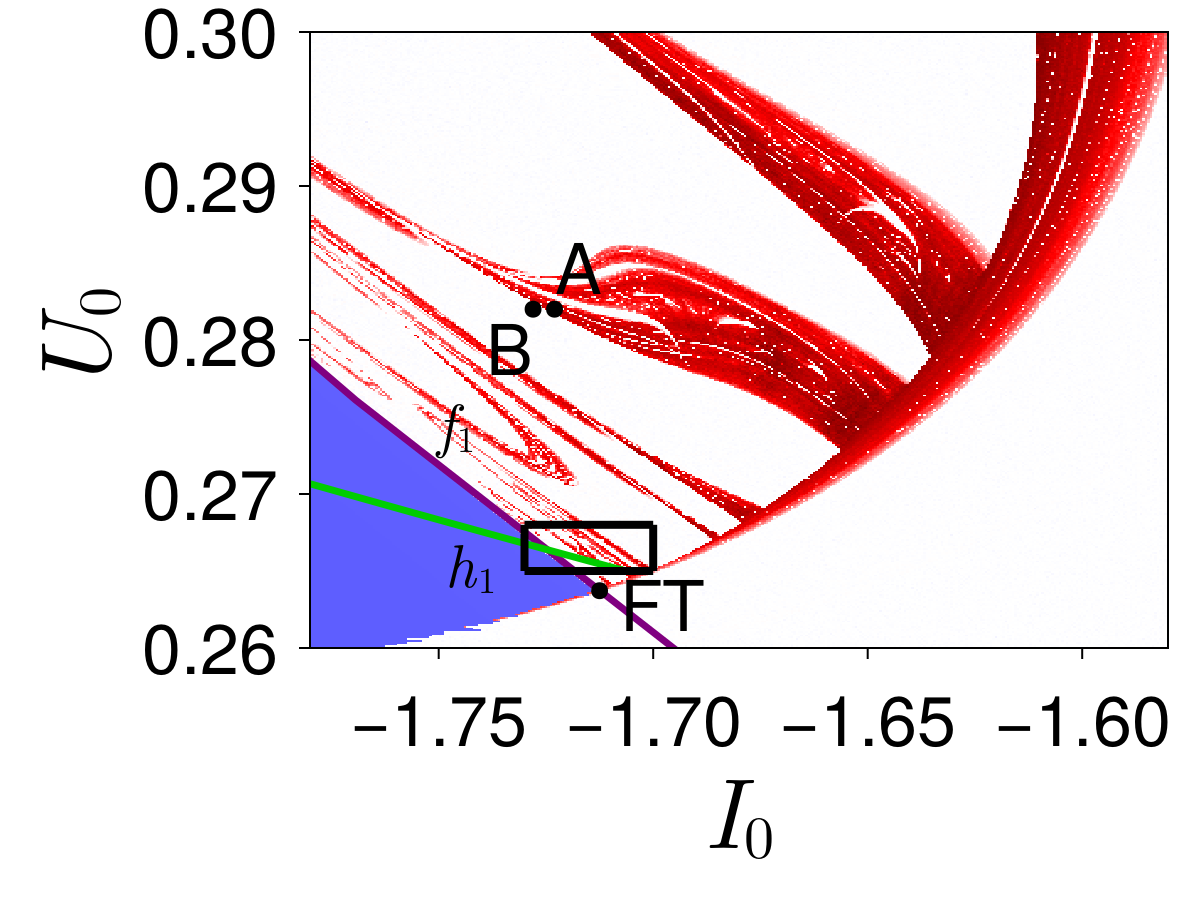

In [62]:
index = 1

ticksize = 35
tickpad = 10.0
textsize = 25
textsizecurve = 30
lw = 3.5
mksize = 12

mx2 = maximum(abs.(Λs[:, :, index]))
mx1 = maximum(abs.(Λs[:, :, index]))
absmax = maximum([mx2, mx1])
mn, mx =  -absmax, absmax
CairoMakie.activate!()
f = Figure()

I0st, I0ed = 1, 350
U0st, U0ed = 1, 350

ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)
            
hm = heatmap!(ax, I0range, U0range, Λs[:, :, index], colormap = :seismic, colorrange = (mn, mx))


lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", linewidth = lw, color = :purple)
text!(ax, -1.7505, 0.27225, text = L"f_1", fontsize = textsizecurve)

colorhom = :green3
lines!(ax, I0_hom, u0_hom, label = "Homoclinic", color = colorhom, linewidth = lw)
text!(ax, I0_hom[250], u0_hom[250], text = L"h_1", fontsize = textsizecurve, align = (:center, :top), offset = (0, -5))

scatter!(ax, -1.1182463005483, 0.161724273501619, markersize = mksize, color = :black)
text!(ax, -1.1182463005483, 0.161724273501619, text = "cusp", fontsize = textsize)

scatter!(ax, -1.30295711421099, 0.179884505801528, markersize = mksize, color = :black)
text!(ax, -1.30295711421099, 0.179884505801528, text = "BT", fontsize = textsize)

scatter!(ax, -1.71286533418216, 0.221636390745317, markersize = mksize, color = :black)
text!(ax, -1.71286533418216, 0.221636390745317, text = "GH", fontsize = textsize)

#scatter!(ax, -1.3311265433046, 0.182481512082655, label = "ZH", markersize = 8, color = :purple)


scatter!(ax, −1.723, 0.282, markersize = 12, color = :black)
text!(ax,  −1.723, 0.282, text = "A", fontsize = 35)
scatter!(ax, -1.728, 0.282, markersize = 12, color = :black)
text!(ax, -1.728, 0.282, text = "B", fontsize = 35, align = (:right, :top))

ylims!(0.26, 0.3)
xlims!(-1.78, -1.58)

#axislegend(ax, position = :lt, labelsize = 35)

lines!([-1.7, -1.73], [0.268, 0.268], color = :black, linewidth = 4.0)
lines!([-1.7, -1.73], [0.265, 0.265], color = :black, linewidth = 4.0)
lines!([-1.7, -1.7], [0.265, 0.268], color = :black, linewidth = 4.0)
lines!([-1.73, -1.73], [0.268, 0.265], color = :black, linewidth  = 4.0)

scatter!(ax, -1.7125, 0.26372, markersize = mksize, color = :black)
text!(ax,  -1.7125, 0.26372, text = "FT", fontsize = 35, align = (:left, :baseline), offset = (10, -20))

#lines!(ax, [-1.65, -1.62], [0.272, 0.274], color = :black, linewidth = lw)

display(f);

In [60]:
pathtosave = "/home/sergey/MEGA/dynamical-systems/Tsodyks Markram/images"
filename = "/space_chaos_hom.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}
